Copyright (c) 2021 Stefanie Molin  
MIT License  
git@github.com:stefmolin/pandas-workshop.git  

# Workbook

Use this notebook to complete the exercises throughout the workshop.

In [1]:
import urllib.request
# Please execute this at the start of the notebook

base_url = 'https://raw.githubusercontent.com/Aenori/20221024_public/main/help_files/pandas/'
helper_files = ['2019_Yellow_Taxi_Trip_Data.csv', 'Meteorite_Landings.csv', 'tsa_melted_holiday_travel.csv']

for helper_file in helper_files:
    urllib.request.urlretrieve(base_url + helper_file, helper_file)

taxi_file, meteorite_file, holiday_file = helper_files

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [2]:
import pandas as pd
df_taxi = pd.read_csv(taxi_file)
df_taxi.head(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


<AxesSubplot:>

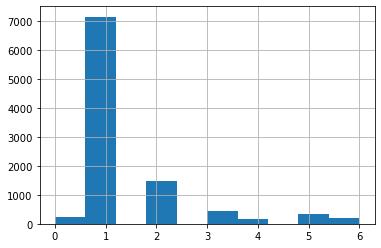

In [22]:
df_taxi['passenger_count'].hist()

#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [5]:
df_taxi.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [7]:
df_taxi[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [15]:
df_taxi.loc[df_taxi['trip_distance'].idxmax(), ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']]

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

In [24]:
df_taxi[df_taxi['fare_amount'] > df_taxi['fare_amount'].mean()]['trip_distance'].mean()

7.588532347504614

In [25]:
df_taxi[df_taxi['fare_amount'] < df_taxi['fare_amount'].mean()]['trip_distance'].mean()

1.3194681288553831

#### Exercise 1.5
##### What is the vendorId that makes the most tip (column `tip_amount`) in average ? In total ?

#### Exercise 1.6
##### What is the average distance (`trip_distance`) of the first half of the data_frame ? Of the second half ?

In [19]:
nbrow, nbcol = df_taxi.shape
df_taxi.loc[:nbrow//2, 'trip_distance'].mean()

2.9037012597480514

In [20]:
nbrow, nbcol = df_taxi.shape
df_taxi.loc[nbrow//2:, 'trip_distance'].mean()

3.1265340000000057

#### Exercise 1.7
##### Who is the fatest driver ? (best average speed, based on pickup time, dropoff time and distance)

#### Exercise 1.8
##### What is the most interesting number of passenger in term of average tip per passenger ? In term of average tip ?

#### Exercise 1.9
##### What is the best hour of the day to get good tip ?

---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.